# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharmadata1 = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
pharmadata1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice.
pharmadata1.count()["Mouse ID"]

1893

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharmadata1[pharmadata1.duplicated(["Mouse ID", "Timepoint"])]
pharmadata1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
pharmadata1[pharmadata1.duplicated(["Mouse ID", "Timepoint"])]
pharmadata1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharmadata1_scrub = pharmadata1.drop_duplicates("Mouse ID")
pharmadata1_scrub

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [35]:
# Checking the number of mice in the clean DataFrame.
pharmadata1_scrub["Mouse ID"].count()

249

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# old code, did not use: regimen_summary = pharmadata1.groupby("Drug Regimen")
# old code, did not use: regiment_summary.head()
stats = pharmadata1.groupby(["Drug Regimen"])
tv_mean = stats["Tumor Volume (mm3)"].mean()
tv_median = stats["Tumor Volume (mm3)"].median()
tv_var = stats["Tumor Volume (mm3)"].var()
tv_sem = stats["Tumor Volume (mm3)"].sem()
tv_SD = stats["Tumor Volume (mm3)"].std()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# old code, did not use: mean = round(regimen_summary["Tumor Volume (mm3)"].mean(),2)
# old code, did not use: median = round(regimen_summary["Tumor Volume (mm3)"].median(),2)
# old code, did not use: variance = 
# old code, did not use: Standard_Deviation = roun(regimen_)


# print(tv_mean, tv_median, tv_var, tv_sem, tv_SD)


# Assemble the resulting series into a single summary DataFrame.
stats_summary_df = pd.DataFrame({"Mean": tv_mean,
                                "Median": tv_median,
                                "Variance": tv_var,
                                "Standard Deviation": tv_SD,
                                "SEM": tv_sem})
stats_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
round(stats["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]),2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

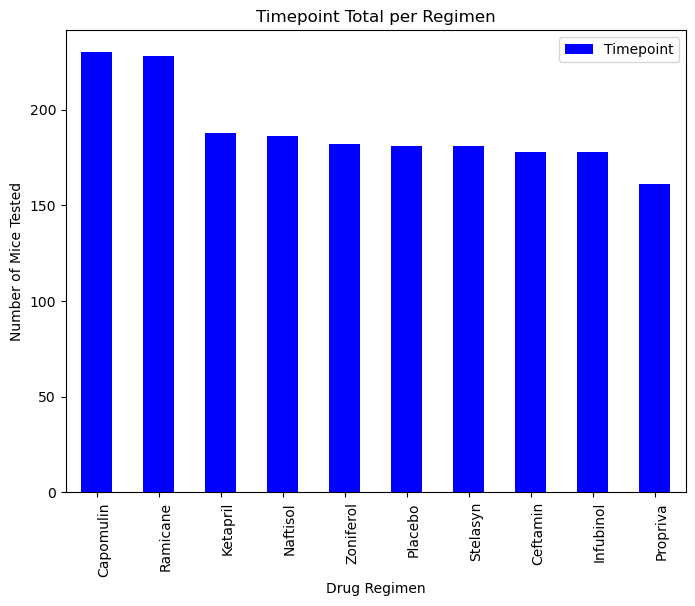

In [92]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_data = pharmadata1[["Drug Regimen", "Timepoint"]]
timepoint_total = timepoint_data.groupby("Drug Regimen").count()
timepoint_total = timepoint_total.sort_values("Timepoint", ascending=False)
fig1 = timepoint_total.plot(kind="bar", facecolor="blue", figsize=(8,6))

# X-tick - configure the rotation
xticklabels = timepoint_total.index
fig1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Plot display
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Timepoint Total per Regimen")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

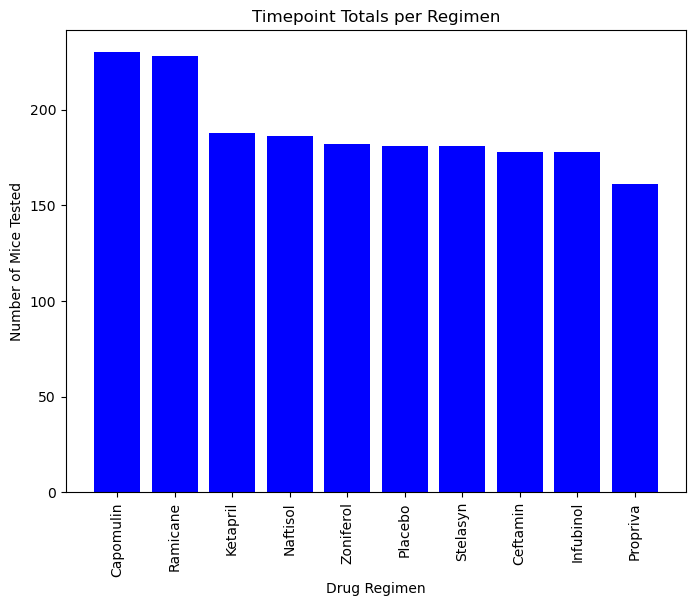

In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = list(timepoint_total.index)
values = list(timepoint_total["Timepoint"])
fig2 = plt.figure(figsize=(8,6))

# Bar plot creation
plt.bar(regimen, values, color="blue", width = 0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Timepoint Totals per Regimen")
plt.xticks(rotation=90)
plt.show


<AxesSubplot:title={'center':'Male Versus Female Mice'}, ylabel='Sex'>

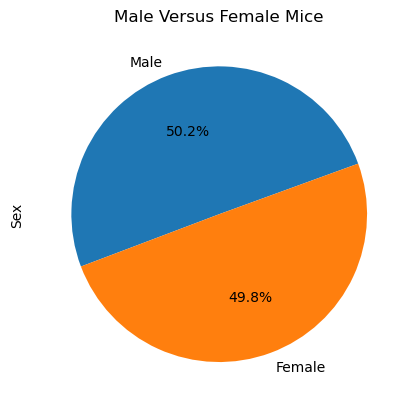

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = pharmadata1_scrub["Sex"].unique()
gender_setup = pharmadata1_scrub["Sex"].value_counts()

# Display graph below
gender_setup.plot.pie(title = "Male Versus Female Mice", autopct = "%1.1f%%", startangle=20)


[Text(0.5, 1.0, 'Male Versus Female Mice'), Text(0, 0.5, 'sex')]

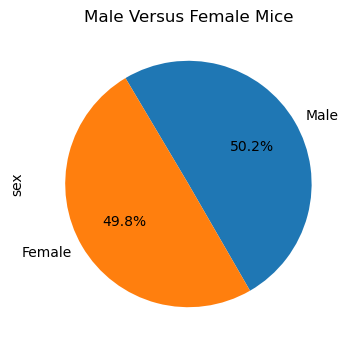

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(gender_setup, labels=gender, autopct = "%1.1f%%", startangle=-60)
ax.set(title="Male Versus Female Mice", ylabel="sex")

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = round(pharmadata1.groupby("Mouse ID").max()["Timepoint"],2)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
pharmadata_merged = round(pd.merge(greatest_timepoint, pharmadata1, on=("Mouse ID", "Timepoint")),2)

pharmadata_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.71,0
245,z578,45,Ramicane,Male,11,16,30.64,0
246,z581,45,Infubinol,Female,24,25,62.75,3
247,z795,45,Naftisol,Female,13,29,65.74,3


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
med_list = ["Ceftamin", "Infubinol", "Ramicane", "Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    
    # Determine outliers using upper and lower bounds
for index, row in pharmadata_merged.iterrows():
    if row["Drug Regimen"] == med_list[0]:
        cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == med_list[1]:
        ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == med_list[2]:
        inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == med_list[3]:
        cef.append(row["Tumor Volume (mm3)"])
        
# Subset
druglist = pd.DataFrame({"Ceftamin": cef, "Infubinol": inf, "Ramicane": ram, "Capomulin": cap})

([<matplotlib.axis.XTick at 0x2ac95af8820>,
 [Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ramicane'),
  Text(4, 0, 'Capomulin')])

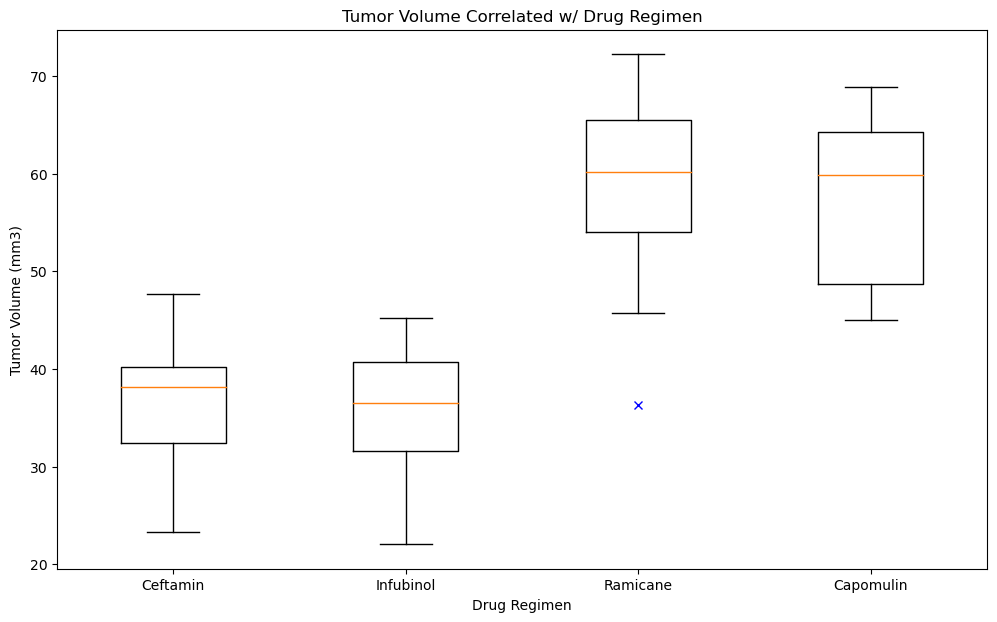

In [125]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = druglist[med_list[0]], druglist[med_list[1]], druglist[med_list[2]], druglist[med_list[3]]

fig, ax = plt.subplots(figsize=(12,7))
ax.boxplot(boxplot, 0, 'bx')
ax.set(title = "Tumor Volume Correlated w/ Drug Regimen", xlabel = "Drug Regimen", ylabel = "Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], med_list)

## Line and Scatter Plots

[Text(0.5, 1.0, 'Subject l509 Capomulin Treatment'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Tumor Volume (mm3)')]

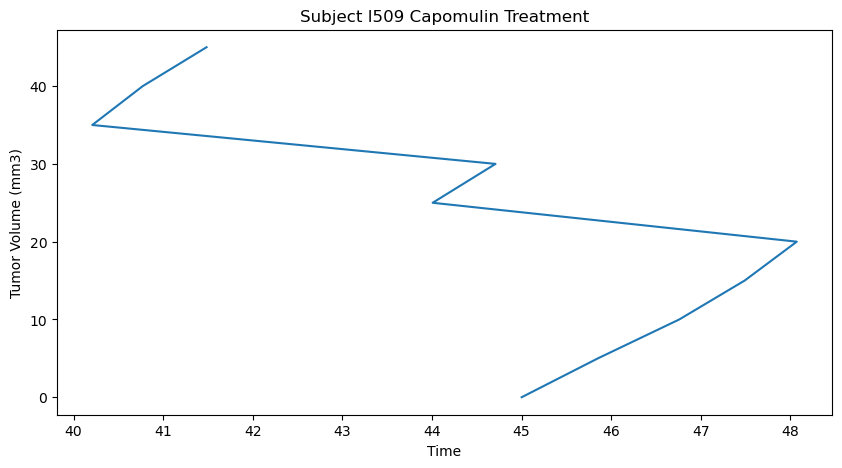

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_cap_treatment = pharmadata1.loc[pharmadata1["Drug Regimen"] == "Capomulin"]
subj_identifier = "l509"
mouse_subj = l509_cap_treatment.loc[pharmadata1["Mouse ID"] == subj_identifier]

tu_vol = mouse_subj["Tumor Volume (mm3)"]
ti_po = mouse_subj["Timepoint"]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(tu_vol, ti_po)
ax.set(title = "Subject l509 Capomulin Treatment", xlabel = "Time", ylabel = "Tumor Volume (mm3)")

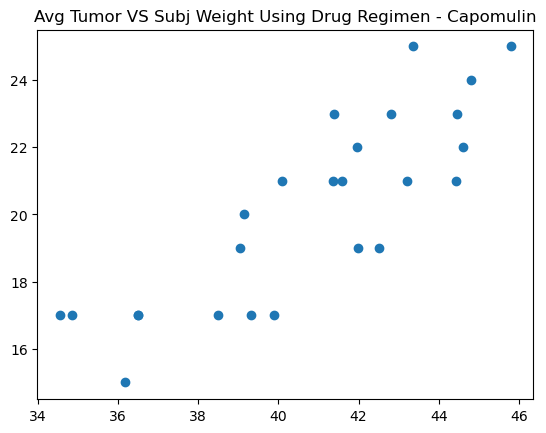

In [132]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regdata_groupd = l509_cap_treatment.groupby("Mouse ID")

avg_tumor = cap_regdata_groupd["Tumor Volume (mm3)"].mean()
subj_lb = cap_regdata_groupd["Weight (g)"].mean()

fig, ax = plt.subplots()

ax.scatter(avg_tumor, subj_lb)
ax.set(title = "Avg Tumor VS Subj Weight Using Drug Regimen - Capomulin")
xlabel = "Weight"
ylabel = "Tumor Volume (mm3)"


## Correlation and Regression

In [142]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlate = st.pearsonr(avg_tumor, subj_lb)
print(f":: INCOMING TRANSMISSION from location ALPHA CENTAURI :: 'Good Morning, Dr. Quest - the correlation between Tumor and Weight regarding our most recent test subject is {round(correlate[0],3)}. Congratulations, you've saved the Mouse King! His planet of cheese nips will be pleased.' :: END TRANSMISSION ::")

:: INCOMING TRANSMISSION from location ALPHA CENTAURI :: 'Good Morning, Dr. Quest - the correlation between Tumor and Weight regarding our most recent test subject is 0.842. Congratulations, you've saved the Mouse King! His planet of cheese nips will be pleased.' :: END TRANSMISSION ::


[Text(0.5, 1.0, 'Size of Tumor in correlation to Mouse Weight'),
 Text(0.5, 0, 'Weight'),
 Text(0, 0.5, 'Tumor Volume (mm3)')]

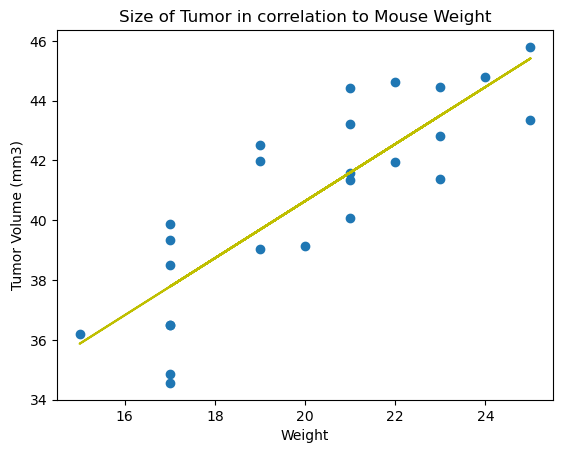

In [161]:
(Line_Slope, Line_Intercept, Line_P, Line_R, Line_stderr) = linregress(subj_lb, avg_tumor) # note: (avg_tumor, subj_lb) in that order screwed up the plot at first
regress_data = (subj_lb * Line_Slope) + Line_Intercept
Equation = "y = " + str(round(Line_Slope,2)) + "x + " + str(round(Line_Intercept,2))

fig, ax = plt.subplots()
ax.scatter(subj_lb, avg_tumor)
ax.plot(subj_lb, regress_data, "y-")
ax.annotate(Equation, (15,58), color="orange", fontsize="35")
ax.set(title="Size of Tumor in correlation to Mouse Weight", xlabel="Weight", ylabel="Tumor Volume (mm3)")